# Principle Components Analysis:

- Linear dimensionality reduction using Singular Value Decomposition of   the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.
- Supervised ML program.
- Feature extraction (Curse of dimensionality)
  - Higher dimension data convert into lower dimension data,while keeping the esense of the data.

**Benefits of PCA**
- Faster execution algo.
- Visulization (PCA hepls to see and reduced the higher dimension data into lower.
                EXP: 100 D data into 2D or 1D).

**Varience**
- How much data is spread.
- Spread directly proportional to varience.
- Soo whatever axis side is data spread is more that axis is better than lower one.

**How to solve PCA**
- Mean centring (Scale the data).
- Find Cov matrix.
- Find Eigen value / vector for Cov matrix.
- Transform from big dimension to small.

## Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset:

In [2]:
df=pd.read_csv('../Transformers/sign_mnist_train.csv')
df.sample(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27185,10,137,142,145,149,152,153,154,156,157,...,254,249,251,251,251,249,247,247,246,245
14988,16,34,72,70,70,72,77,80,83,87,...,0,0,0,0,0,25,216,209,211,212
24387,0,132,137,140,141,142,145,147,150,150,...,145,214,201,204,205,204,204,204,204,204
8852,20,45,51,72,96,110,115,125,137,143,...,45,0,0,6,0,0,0,0,0,0
16870,1,199,200,200,200,201,201,201,201,200,...,84,203,220,197,150,95,67,57,62,73
17487,24,174,176,178,179,178,181,181,181,181,...,198,198,196,196,195,194,192,190,187,186
21111,13,179,181,184,186,187,189,190,190,190,...,224,229,228,226,226,225,224,223,222,220
3903,23,131,139,149,155,159,163,167,171,174,...,76,12,18,33,28,27,19,5,11,19
15891,23,98,108,118,126,129,132,138,143,147,...,104,103,102,103,102,101,101,100,98,114
11585,14,229,229,228,231,230,231,231,230,229,...,121,122,131,158,189,215,228,233,237,228


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [4]:
df.shape

(27455, 785)

**1 image is equall to 28 28 pixels**,
**28*28=784 columns and 1 column is label column**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print('Xtrain shape',X_train.shape)
print('Xtest shape',X_test.shape)
print('ytrain shape',y_train.shape)
print('ytest shape',y_test.shape)

Xtrain shape (21964, 784)
Xtest shape (5491, 784)
ytrain shape (21964,)
ytest shape (5491,)


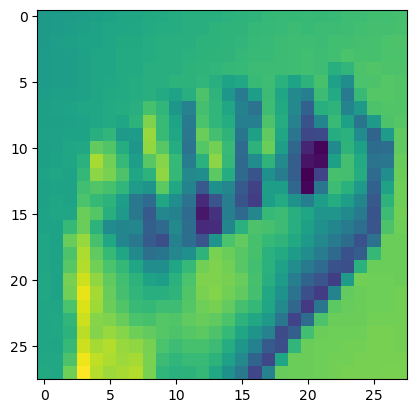

In [8]:
plt.imshow(df.iloc[50,1:].values.reshape(28,28))

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
knn=KNeighborsClassifier()

In [11]:
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print('Before appling PCA accuracy score is',accuracy_score(y_test,y_pred))

Before appling PCA accuracy score is 0.9959934438171554


**Now first step is to scale the data**

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scale=StandardScaler()

In [14]:
X_train=scale.fit_transform(X_train)

X_test=scale.transform(X_test)

In [15]:
X_train

array([[-1.1761998 , -2.09806037, -0.60012897, ..., -1.13986815,
        -1.09996883, -1.06692834],
       [ 1.67937834,  1.68848848,  1.68209134, ..., -0.60211565,
        -2.16745393, -0.30654775],
       [-0.03880851, -0.09194177, -0.13855632, ..., -0.44395315,
        -0.94298572, -1.36176979],
       ...,
       [ 1.14698242,  1.13680587,  1.117947  , ..., -0.6495644 ,
        -0.64471783, -0.66346109],
       [ 1.31638112,  1.31234125,  1.2205187 , ..., -0.5546669 ,
        -1.41393504, -1.54798544],
       [-0.76480295, -0.64362439, -0.49755727, ..., -1.77251815,
        -2.34013535, -0.98933848]])

**Now applying PCA**

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca=PCA(n_components=300) # n_components is how much components requird to perform PCA.

X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [18]:
X_train_trf

array([[ 3.51336372e+01, -8.95013305e+00, -9.56629195e+00, ...,
        -7.00607759e-01,  4.67280980e-02, -4.54382594e-01],
       [-2.80136598e+00,  8.72633327e+00,  6.35852765e+00, ...,
         4.67731059e-02,  7.91449581e-01, -1.36454738e-01],
       [ 8.87281238e+00,  2.02205517e+00,  3.97206883e+00, ...,
         2.49854237e-01,  3.81606124e-01,  1.27593175e-01],
       ...,
       [-2.19120336e+01,  4.61383841e+00, -2.63732713e+00, ...,
        -2.41910850e-01, -1.28090937e-01,  2.26686844e-02],
       [ 9.28101182e+00,  1.54007122e+01,  1.70282516e+01, ...,
         2.47574687e-01, -6.54566337e-01,  1.34628534e-01],
       [ 1.12371804e+00, -1.43276695e+01,  1.09197357e+01, ...,
        -4.08683909e-01,  2.14615260e-01, -7.10320513e-01]])

In [19]:
knn=KNeighborsClassifier()

In [20]:
knn.fit(X_train_trf,y_train)

y_pred_trf=knn.predict(X_test_trf)

print('After appling PCA accuracy is',accuracy_score(y_test,y_pred_trf))

After appling PCA accuracy is 0.9950828628665088


Before appling PCA accuracy score is 0.9954470952467674

After appling PCA accuracy is 0.9952649790566381

**Now we find the best n_component value to maximize the score**

**Firstly we can take a visulization in 2d chart**

In [21]:
pca=PCA(n_components=2) 
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [23]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
               y=X_train_trf[:,1],
               color=y_train_trf,
               color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

**Now look into 3d**

In [24]:
pca=PCA(n_components=3) 
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [25]:
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df,x=X_train_trf[:,0], y=X_train_trf[:,1],z=X_train_trf[:,2],
                  color = y_train_trf)
fig.update_layout(margin=dict(l=20 , r=20, t= 20 , b=20))
fig.show()

In [26]:
# This is eigen values of top 3 components
pca.explained_variance_

array([279.53923663,  65.65432499,  55.06813369])

In [29]:
# This tell us about the percentage of varience 
pca.explained_variance_ratio_

array([0.35653892, 0.08373895, 0.07023677])

In [32]:
print('This top 3 components covers the',0.3*100+0.08*100+0.07*100,'% varience of the data')

This top 3 components covers the 45.0 % varience of the data


In [28]:
# This is eigen vector 
pca.components_

array([[-0.04769596, -0.04914705, -0.05059328, ..., -0.01847575,
        -0.01715696, -0.01597225],
       [ 0.05415085,  0.05208143,  0.04969027, ...,  0.01472052,
         0.01069226,  0.00819213],
       [ 0.01587315,  0.016181  ,  0.01913722, ..., -0.08870564,
        -0.08765389, -0.08526078]])

**Now we find best optimimum no of PC required**

In [33]:
pca=PCA(n_components=None) 
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [35]:
pca.components_.shape

(784, 784)

In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35653892, 0.44027786, 0.51051463, 0.55971925, 0.59616592,
       0.62265443, 0.64817694, 0.66858505, 0.68682781, 0.70308873,
       0.71691195, 0.72988374, 0.74115144, 0.75135541, 0.76030363,
       0.76846645, 0.77594729, 0.78305184, 0.78987108, 0.79587659,
       0.80143564, 0.80650726, 0.81143552, 0.81618417, 0.82053277,
       0.82456471, 0.82845332, 0.83206661, 0.83548642, 0.83886384,
       0.84208968, 0.84525316, 0.84832906, 0.85128974, 0.85413748,
       0.85691845, 0.85955266, 0.86215656, 0.86465827, 0.86710358,
       0.86948402, 0.87170633, 0.87386415, 0.87597058, 0.87804658,
       0.88006297, 0.88201865, 0.88391335, 0.88575684, 0.88753697,
       0.8892822 , 0.89100561, 0.89268195, 0.89428824, 0.89582391,
       0.89734357, 0.89880947, 0.90024696, 0.90166318, 0.90306761,
       0.90446065, 0.90581454, 0.90715029, 0.90842547, 0.90968089,
       0.91090723, 0.91212337, 0.91330083, 0.9144609 , 0.91560629,
       0.91672889, 0.9178416 , 0.91891919, 0.91998401, 0.92104

Text(0, 0.5, 'Varience')

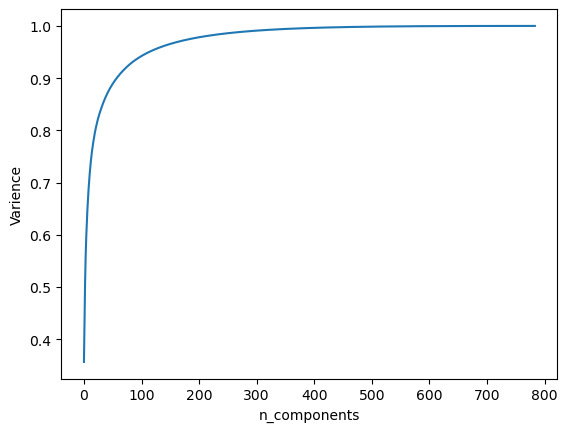

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('Varience')

**We take 150 n-components coz they are above the 90% score**

In [48]:
pca=PCA(n_components=150) # n_components is how much components requird to perform PCA.

X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

knn=KNeighborsClassifier()

knn.fit(X_train_trf,y_train)

y_pred_trf=knn.predict(X_test_trf)

print('After find the best n_components PCA accuracy is',accuracy_score(y_test,y_pred_trf))


After find the best n_components PCA accuracy is 0.9936259333454744


Before find the best n_components PCA accuracy score is 0.9954470952467674

After find the best n_components PCA accuracy is 0.9936259333454744

**Summary**
- Firstly we take all components and the score is 99.54 .
- After find the n_components the score is 99.36.

**SO LOOK AT WE TAKE 150 COMPONENTS OUT OF 784 AND FIND THE BEST SCORE ALSO REDUCED THE CURSE OF DIMENSIONALTY.